### Feature example
This notebook illustrates how to check the mass balance at each grid cell with xflux0, xflux1, yflux0, yflux1

In [71]:
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

import gzip
import shutil, os, sys
import pandas as pd
import json


%matplotlib inline

In [72]:
current_dir = os.getcwd()
for mod in ['plot_functions', 'feature_functions']:
    if mod in sys.modules: 
        del sys.modules[mod]

from feature_functions import *   
from plot_functions import *


In [73]:
# Print some details about the simulation notebook
example_name = "example_2by2" # should correspond to one of the example subdirectories
example_name = "example_rain" 
example_dir = "/".join([current_dir,example_name])
fname = "/".join([example_name,'params.json'])
params = json.load(open(fname))


In [74]:
# Load SVE-R simulation
sim_file = '/'.join([example_dir,  'sim.pklz' ]) 
f = gzip.open(sim_file,'rb')
sim = pickle.load(f) 
f.close()  
sim = pd.Series(sim)

Text(0.5,1,'Hydrographs')

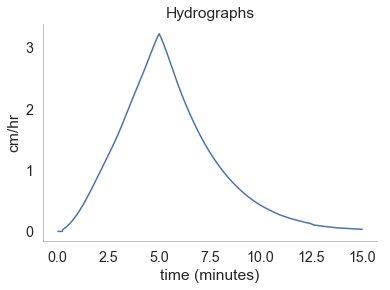

In [75]:
# check for a sensible hydrograph
plt.figure()
plt.plot(sim['t_h']/60., sim['hydro']*3.6e3)

plt.xlabel('time (minutes)')
plt.ylabel('cm/hr')
plt.title('Hydrographs')


### Check global mass balance

Text(0.5,1,'Fluxes')

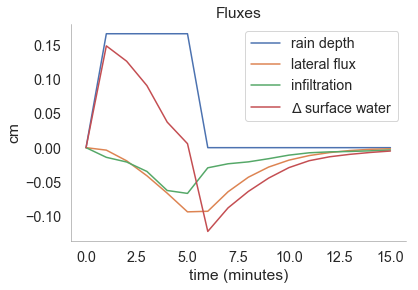

In [78]:
rain_depth = np.ones_like(sim.t_p)*sim.rain*100*sim.t_p[1]
rain_depth[ sim.t_p > sim.t_rain] =0
rain_depth[0] = 0
# check for a sensible hydrograph
plt.figure()
plt.plot(sim['t_p']/60, sim['zrain'], label = "rain depth")
plt.plot(sim['t_p']/60., sim['flux'], label = "lateral flux")
plt.plot(sim['t_p']/60., sim['infl'], label = "infiltration")
plt.plot(sim['t_p']/60., sim['dvol'], label = "$\Delta$ surface water")


# plt.plot(sim['t_p']/60., sim['']*3.6e3)
plt.legend()
plt.xlabel('time (minutes)')
plt.ylabel('cm')
plt.title('Fluxes')


Text(0.5,1,'mass balance')

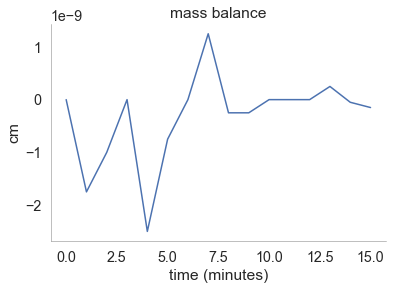

In [81]:
# check for a sensible hydrograph
plt.figure()
plt.plot(sim['t_p']/60,  sim['dvol']-sim['zrain'] -sim['flux'] - sim['infl'] )
plt.xlabel('time (minutes)')
plt.ylabel('cm')
plt.title("mass balance")


### Mass balance chack between two points in time

In [82]:
# choose consecutive time points
t1 = 6
t0 = 5
# compute change in h
dh = -(sim.hc[t1]- sim.hc[t0] )
# lateral divergence from time t0 to t1
fluxes = (sim.yflux0[t1]-sim.yflux1[t1] + sim.xflux0[t1]-sim.xflux1[t1])/100 
# added rain
dp = sim.rain*(sim.t_p[t1] - sim.t_p[t0])

0.000833404416533891 4.981081750368932e-08


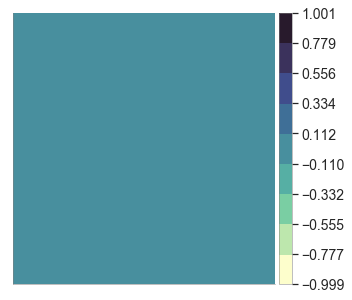

In [83]:
mass_bal = dh + fluxes + dp - sim.inflVmap[t1]/100
colormap(sim, mass_bal)
# mass balance from t0 to t1 in m
print mass_bal.mean(), mass_bal.std()
